In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
from pandas import Series 
from pandas import DataFrame

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\zomato-restaurants-data\zomato.csv", encoding = "unicode escape")

In [3]:
df.head(3)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   

                           Cuisines  ...           Currency Has Table booking  \
0        French, Japanese, Desserts  ...   Botswana Pula(P)               Yes   
1                          Japanese  ...   Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...   Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  

[3 rows x 21 columns]

In [4]:
# Resizing the dataframe 

In [5]:
# we dont need the restaurant Id , restaurant street address,Locality the verbose locality Longitude , Latitude
# so we drop these feilds before moving forward

In [6]:
df = df.drop(['Restaurant ID','Address','Locality','Locality Verbose','Longitude','Latitude'], axis=1)

In [7]:
df.head(3)

Restaurant Name  Country Code              City  \
0        Le Petit Souffle           162       Makati City   
1        Izakaya Kikufuji           162       Makati City   
2  Heat - Edsa Shangri-La           162  Mandaluyong City   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270

In [8]:
# make restaurant names as row names to increase readibility 
df = df.set_index(["Restaurant Name"])
df.head(3)

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   

                       Has Table booking Has Online delivery  \
Restaurant Name                                                
Le Petit Souffle                     Yes                  No   
Izakaya Kikufuji                     Yes                  No   
Heat - Edsa Shangri-La               Yes                  No   

                       Is delivering now Switch to order menu  Price range  \
Restaurant Name                                                              
Le Petit Souffle                      No                   No            3   
Izakaya Kikufuji                      No                   No            3   
Heat - Edsa Shangri-La                No                   No            4   

                        Aggregate rating Rating color Rating text  Votes  
Restaurant Name                                                           
Le Petit Souffle                     4.8   Dark Green   Excellent    314  
Izakaya Kikufuji                     4.5   Dark Green   Excellent    591  
Heat - Edsa Shangri-La               4.4        Green   Very Good    270

In [9]:
null_values = df.isnull().sum()
null_values

Country Code            0
City                    0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
# only cuisine feature has NaN values 
# to take care of the values we cant use mean 
# we use the ffill method. 

In [11]:
df = df.fillna(method='ffill')
null_values = df.isnull().sum()
null_values

Country Code            0
City                    0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
# so the null values have been filled in sucessfully.

In [13]:
for value in df["Has Table booking"]:
    if(value == 'Yes'):
       df['Has Table booking'] = df['Has Table booking'].replace(['Yes'], 1)
    else:
      df['Has Table booking'] = df['Has Table booking'].replace(['No'], 0)
        
df.head(5)  

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   
Ooma                             162  Mandaluyong City   
Sambo Kojin                      162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
Ooma                                     Japanese, Sushi   
Sambo Kojin                             Japanese, Korean   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   
Ooma                                    1500  Botswana Pula(P)   
Sambo Kojin                             1500  Botswana Pula(P)   

                        Has Table booking Has Online delivery  \
Restaurant Name                                                 
Le Petit Souffle                        1                  No   
Izakaya Kikufuji                        1                  No   
Heat - Edsa Shangri-La                  1                  No   
Ooma                                    0                  No   
Sambo Kojin                             1                  No   

                       Is delivering now Switch to order menu  Price range  \
Restaurant Name                                                              
Le Petit Souffle                      No                   No            3   
Izakaya Kikufuji                      No                   No            3   
Heat - Edsa Shangri-La                No                   No            4   
Ooma                                  No                   No            4   
Sambo Kojin                           No                   No            4   

                        Aggregate rating Rating color Rating text  Votes  
Restaurant Name                                                           
Le Petit Souffle                     4.8   Dark Green   Excellent    314  
Izakaya Kikufuji                     4.5   Dark Green   Excellent    591  
Heat - Edsa Shangri-La               4.4        Green   Very Good    270  
Ooma                                 4.9   Dark Green   Excellent    365  
Sambo Kojin                          4.8   Dark Green   Excellent    229

In [14]:
for value in df["Has Online delivery"]:
    if(value == 'Yes'):
       df['Has Online delivery'] = df['Has Online delivery'].replace(['Yes'], 1)
    else:
      df['Has Online delivery'] = df['Has Online delivery'].replace(['No'], 0)
        
df.head(5)  

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   
Ooma                             162  Mandaluyong City   
Sambo Kojin                      162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
Ooma                                     Japanese, Sushi   
Sambo Kojin                             Japanese, Korean   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   
Ooma                                    1500  Botswana Pula(P)   
Sambo Kojin                             1500  Botswana Pula(P)   

                        Has Table booking  Has Online delivery  \
Restaurant Name                                                  
Le Petit Souffle                        1                    0   
Izakaya Kikufuji                        1                    0   
Heat - Edsa Shangri-La                  1                    0   
Ooma                                    0                    0   
Sambo Kojin                             1                    0   

                       Is delivering now Switch to order menu  Price range  \
Restaurant Name                                                              
Le Petit Souffle                      No                   No            3   
Izakaya Kikufuji                      No                   No            3   
Heat - Edsa Shangri-La                No                   No            4   
Ooma                                  No                   No            4   
Sambo Kojin                           No                   No            4   

                        Aggregate rating Rating color Rating text  Votes  
Restaurant Name                                                           
Le Petit Souffle                     4.8   Dark Green   Excellent    314  
Izakaya Kikufuji                     4.5   Dark Green   Excellent    591  
Heat - Edsa Shangri-La               4.4        Green   Very Good    270  
Ooma                                 4.9   Dark Green   Excellent    365  
Sambo Kojin                          4.8   Dark Green   Excellent    229

In [15]:
df = df.drop(['Switch to order menu'], axis=1)
df.head(5)

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   
Ooma                             162  Mandaluyong City   
Sambo Kojin                      162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
Ooma                                     Japanese, Sushi   
Sambo Kojin                             Japanese, Korean   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   
Ooma                                    1500  Botswana Pula(P)   
Sambo Kojin                             1500  Botswana Pula(P)   

                        Has Table booking  Has Online delivery  \
Restaurant Name                                                  
Le Petit Souffle                        1                    0   
Izakaya Kikufuji                        1                    0   
Heat - Edsa Shangri-La                  1                    0   
Ooma                                    0                    0   
Sambo Kojin                             1                    0   

                       Is delivering now  Price range  Aggregate rating  \
Restaurant Name                                                           
Le Petit Souffle                      No            3               4.8   
Izakaya Kikufuji                      No            3               4.5   
Heat - Edsa Shangri-La                No            4               4.4   
Ooma                                  No            4               4.9   
Sambo Kojin                           No            4               4.8   

                       Rating color Rating text  Votes  
Restaurant Name                                         
Le Petit Souffle         Dark Green   Excellent    314  
Izakaya Kikufuji         Dark Green   Excellent    591  
Heat - Edsa Shangri-La        Green   Very Good    270  
Ooma                     Dark Green   Excellent    365  
Sambo Kojin              Dark Green   Excellent    229

In [16]:
# Interpretation of data 

In [17]:
# observation 
# Rating color and Rating text have a 100% correspondance 
# Dark green = excellent , green = very good , yellow = good , orange = average , red = poor , white = not enough reviews
# thus removing redundancy be dropping rating color column

In [18]:
df = df.drop(['Rating color'], axis=1)
df.head(5)

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   
Ooma                             162  Mandaluyong City   
Sambo Kojin                      162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
Ooma                                     Japanese, Sushi   
Sambo Kojin                             Japanese, Korean   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   
Ooma                                    1500  Botswana Pula(P)   
Sambo Kojin                             1500  Botswana Pula(P)   

                        Has Table booking  Has Online delivery  \
Restaurant Name                                                  
Le Petit Souffle                        1                    0   
Izakaya Kikufuji                        1                    0   
Heat - Edsa Shangri-La                  1                    0   
Ooma                                    0                    0   
Sambo Kojin                             1                    0   

                       Is delivering now  Price range  Aggregate rating  \
Restaurant Name                                                           
Le Petit Souffle                      No            3               4.8   
Izakaya Kikufuji                      No            3               4.5   
Heat - Edsa Shangri-La                No            4               4.4   
Ooma                                  No            4               4.9   
Sambo Kojin                           No            4               4.8   

                       Rating text  Votes  
Restaurant Name                            
Le Petit Souffle         Excellent    314  
Izakaya Kikufuji         Excellent    591  
Heat - Edsa Shangri-La   Very Good    270  
Ooma                     Excellent    365  
Sambo Kojin              Excellent    229

In [19]:
# plot according to User Ratings 

In [20]:
user_ratings = df['Rating text']

In [21]:
excellent = 0
very_good = 0
good = 0
average = 0 
poor = 0
not_enough_reviews = 0 

        
    

In [22]:
for value in user_ratings:
    if(value == 'Excellent'):
        excellent += 1
    elif(value == 'Very Good'):
        very_good += 1
    elif(value == 'Good'):
        good += 1
    elif(value == 'Average'):
        average += 1
    elif(value == 'Poor'):
        poor +=1
    else:
        not_enough_reviews += 1

In [23]:
user_ratings = [excellent,very_good,good,average,poor,not_enough_reviews]
x = np.arange(len(user_ratings))
y = [y for y in user_ratings]



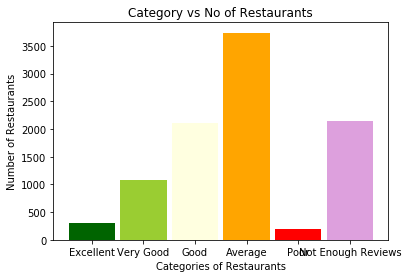

In [24]:
wide = [0.9]
colors = ['darkgreen', 'yellowgreen', 'lightyellow', 'orange','Red','plum']
plt.bar(x,y,width = wide, color = colors, align = 'center')
plt.ylabel("Number of Restaurants")
plt.xlabel("Categories of Restaurants")
labels = ['Excellent','Very Good', 'Good', 'Average','Poor','Not Enough Reviews'] 
plt.xticks(x, labels)
plt.title("Category vs No of Restaurants")
plt.savefig('ratings_bar.jpeg')


In [25]:
user_ratings_percentage = [0,0,0,0,0,0]
total = np.sum(user_ratings)

In [26]:
index = 0
for value in user_ratings:
    new_value = (value/total) * 100
    new_value = round(new_value , 2)
    user_ratings_percentage[index] = new_value
    index += 1

In [27]:
user_ratings_percentage

[3.15, 11.3, 21.99, 39.13, 1.95, 22.49]

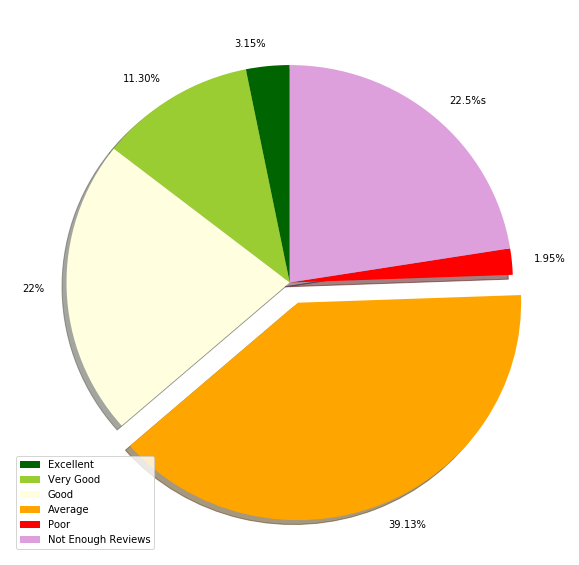

In [28]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,10

explode = (0,0,0,0.1,0,0)
labels = ["3.15%", '11.30%', '22%', '39.13%','1.95%','22.5%s']
colors = ['darkgreen', 'yellowgreen', 'lightyellow', 'orange','Red','plum']
plt.pie(user_ratings_percentage, explode = explode , labels = labels, colors = colors, shadow = True ,startangle=90)
labels = ['Excellent', 'Very Good', 'Good', 'Average','Poor','Not Enough Reviews']
plt.legend(labels, loc="lower left")
plt.savefig('ratings_percentage.jpeg')

In [29]:
plt.savefig('ratings_percentage.jpeg')

<Figure size 720x720 with 0 Axes>

In [30]:
# plotting top 5 restaurants

In [31]:
df.head(3)

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   

                        Has Table booking  Has Online delivery  \
Restaurant Name                                                  
Le Petit Souffle                        1                    0   
Izakaya Kikufuji                        1                    0   
Heat - Edsa Shangri-La                  1                    0   

                       Is delivering now  Price range  Aggregate rating  \
Restaurant Name                                                           
Le Petit Souffle                      No            3               4.8   
Izakaya Kikufuji                      No            3               4.5   
Heat - Edsa Shangri-La                No            4               4.4   

                       Rating text  Votes  
Restaurant Name                            
Le Petit Souffle         Excellent    314  
Izakaya Kikufuji         Excellent    591  
Heat - Edsa Shangri-La   Very Good    270

In [32]:
df = df.drop('Is delivering now',axis = 1)
df.head(3)

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   

                        Average Cost for two          Currency  \
Restaurant Name                                                  
Le Petit Souffle                        1100  Botswana Pula(P)   
Izakaya Kikufuji                        1200  Botswana Pula(P)   
Heat - Edsa Shangri-La                  4000  Botswana Pula(P)   

                        Has Table booking  Has Online delivery  Price range  \
Restaurant Name                                                               
Le Petit Souffle                        1                    0            3   
Izakaya Kikufuji                        1                    0            3   
Heat - Edsa Shangri-La                  1                    0            4   

                        Aggregate rating Rating text  Votes  
Restaurant Name                                              
Le Petit Souffle                     4.8   Excellent    314  
Izakaya Kikufuji                     4.5   Excellent    591  
Heat - Edsa Shangri-La               4.4   Very Good    270

In [33]:
average_rating = df['Aggregate rating']

In [34]:
average_rating.unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [35]:
lot1 = 0
lot2 = 0 
lot3 = 0
lot4 = 0 
lot5 = 0
lot6 = 0 
lot7 = 0

In [36]:
for value in average_rating:
    if(value >= 1.5 and value < 2.0):
        lot1 += 1
    elif(value >= 2.0 and value <2.5):
        lot2 += 1
    elif(value >= 2.5 and value < 3.0):
        lot3 += 1
    elif(value >= 3.0 and value <3.5):
        lot4 += 1
    elif(value >= 3.5 and value <4.0):
        lot5 += 1
    elif(value >= 4.0 and value < 4.5):
        lot6 += 1
    else:
        lot7 += 1
        

In [37]:
average_ratings_grouped = [lot1,lot2,lot3,lot4,lot5,lot6,lot7]
x = np.arange(len(average_ratings_grouped))
y = [y for y in average_ratings_grouped]


In [38]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,10

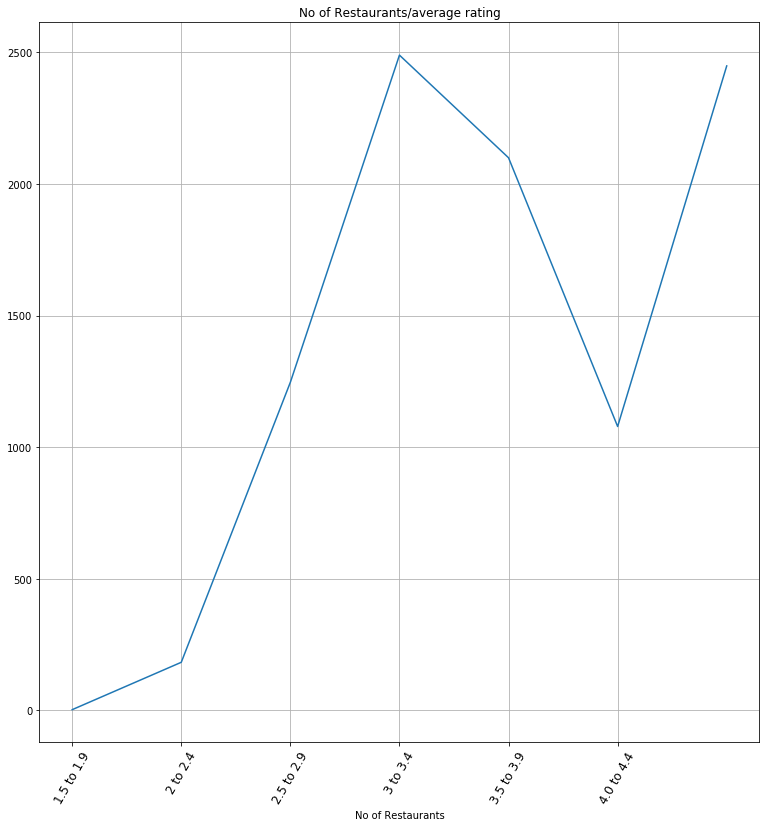

In [39]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
plt.plot(average_ratings_grouped)
ax.set_xticks(range(6))
ax.set_xticklabels(['1.5 to 1.9','2 to 2.4','2.5 to 2.9','3 to 3.4','3.5 to 3.9','4.0 to 4.4','4.5 to 4.9'], rotation = 60, fontsize = 'large')
ax.grid(which='both')
ax.set_title('No of Restaurants/average rating')
ax.set_xlabel('average rating')
ax.set_xlabel('No of Restaurants')
plt.savefig('average_ratings_oog.jpeg')


In [40]:
average_ratings_percentage = [0,0,0,0,0,0,0]
total = np.sum(average_ratings_grouped)

In [41]:
index = 0
for value in average_ratings_grouped:
    new_value = (value/total) * 100
    new_value = round(new_value , 2)
    average_ratings_percentage[index] = new_value
    index += 1

In [42]:
average_ratings_percentage

[0.03, 1.92, 13.06, 26.07, 21.99, 11.3, 25.64]

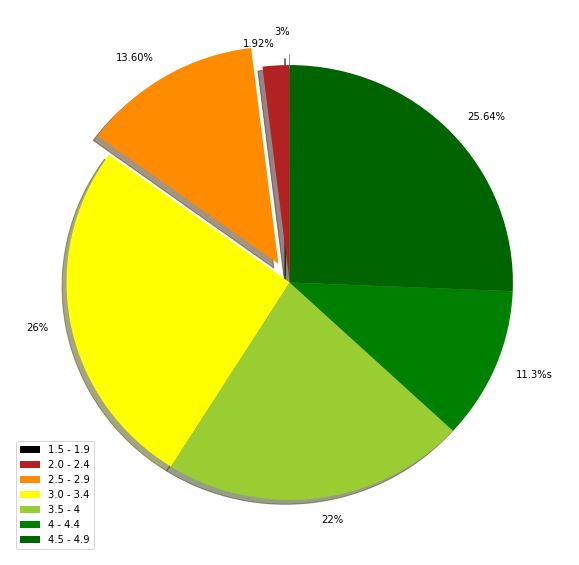

In [43]:
explode = (0.05,0,0.1,0,0,0,0)
labels = ["3%", '1.92%', '13.60%', '26%','22%','11.3%s','25.64%']
colors = ['black', 'firebrick', 'darkorange', 'yellow','yellowgreen','green','darkgreen']
plt.pie(average_ratings_percentage, explode = explode , labels = labels, colors = colors, shadow = True ,startangle=90)
labels = ['1.5 - 1.9', '2.0 - 2.4', '2.5 - 2.9','3.0 - 3.4','3.5 - 4','4 - 4.4','4.5 - 4.9']
plt.legend(labels, loc="lower left")
plt.savefig('average_ratings_pie.jpeg')

In [44]:
# plot on online delivery and online booking 

In [45]:
df.head(2)

Country Code         City                    Cuisines  \
Restaurant Name                                                           
Le Petit Souffle           162  Makati City  French, Japanese, Desserts   
Izakaya Kikufuji           162  Makati City                    Japanese   

                  Average Cost for two          Currency  Has Table booking  \
Restaurant Name                                                               
Le Petit Souffle                  1100  Botswana Pula(P)                  1   
Izakaya Kikufuji                  1200  Botswana Pula(P)                  1   

                  Has Online delivery  Price range  Aggregate rating  \
Restaurant Name                                                        
Le Petit Souffle                    0            3               4.8   
Izakaya Kikufuji                    0            3               4.5   

                 Rating text  Votes  
Restaurant Name                      
Le Petit Souffle   Excellent    314  
Izakaya Kikufuji   Excellent    591

In [46]:
online_delivery = df['Has Online delivery'].astype(str)
table_booking = df['Has Table booking'].astype(str)

In [47]:
category1 = 0
category2 = 0 
category3 = 0 
category4 = 0

In [48]:
for index in range(len(online_delivery)-1):
    online_delivery[index] = online_delivery[index] + table_booking[index]

In [49]:
for category_status in online_delivery:
    if (category_status == '00'):
        category4 += 1
    elif(category_status == '11'):
        category1 += 1
    elif(category_status == '10'):
        category2 += 1
    elif(category_status == '01'):
        category3 += 1   

In [50]:
category_vector = [category1,category2,category3,category4]
x = np.arange(len(category_vector))
y = [y for y in category_vector]

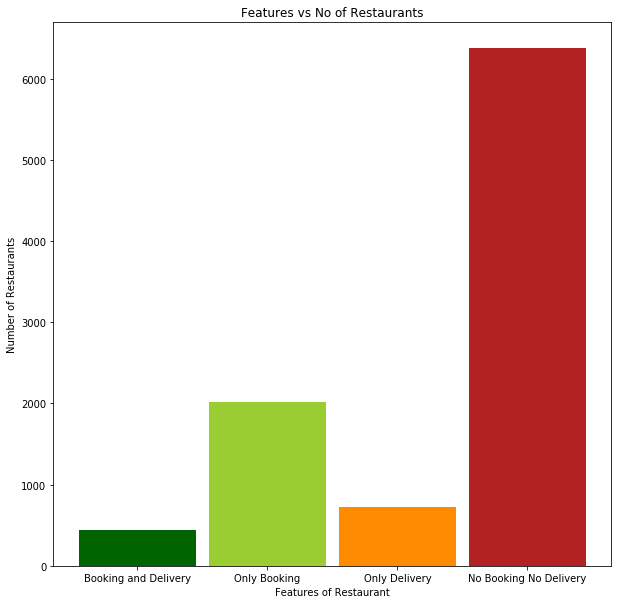

In [51]:
wide = [0.9]
colors = ['darkgreen', 'yellowgreen', 'darkorange','firebrick']
plt.bar(x,y,width = wide, color = colors, align = 'center')
plt.ylabel("Number of Restaurants")
plt.xlabel("Features of Restaurant")
labels = ['Booking and Delivery','Only Booking','Only Delivery','No Booking No Delivery'] 
plt.xticks(x, labels)
plt.title("Features vs No of Restaurants")
plt.savefig('Features_bar.jpeg')

In [52]:
restaurant_features_percentage = [0,0,0,0]
total = np.sum(category_vector)

In [53]:
index = 0
for value in category_vector:
    new_value = (value/total) * 100
    new_value = round(new_value , 2)
    restaurant_features_percentage[index] = new_value
    index += 1
restaurant_features_percentage

[4.55, 21.11, 7.57, 66.76]

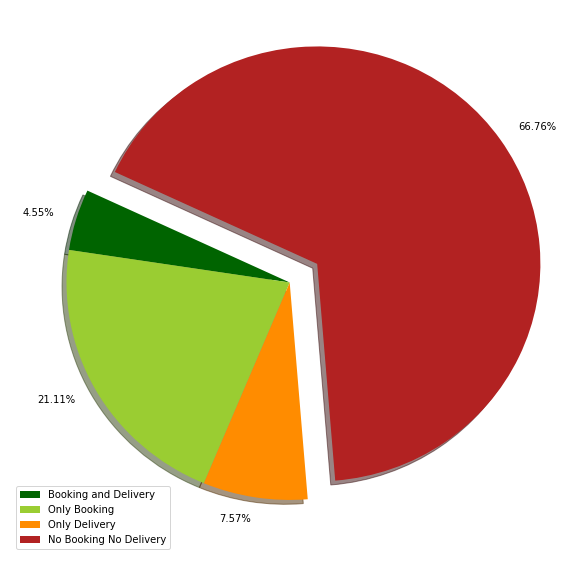

In [54]:
explode = (0,0,0,0.15)
labels = ['4.55%','21.11%','7.57%','66.76%']
colors = ['darkgreen', 'yellowgreen', 'darkorange','firebrick']
plt.pie(restaurant_features_percentage, explode = explode , labels = labels, colors = colors, shadow = True ,startangle=155)
labels = ['Booking and Delivery','Only Booking','Only Delivery','No Booking No Delivery'] 
plt.legend(labels, loc="lower left")
plt.savefig('features_percentage_pie.jpeg')

In [55]:
# according to price

In [56]:
df.head(2)

Country Code         City                    Cuisines  \
Restaurant Name                                                           
Le Petit Souffle           162  Makati City  French, Japanese, Desserts   
Izakaya Kikufuji           162  Makati City                    Japanese   

                  Average Cost for two          Currency  Has Table booking  \
Restaurant Name                                                               
Le Petit Souffle                  1100  Botswana Pula(P)                  1   
Izakaya Kikufuji                  1200  Botswana Pula(P)                  1   

                  Has Online delivery  Price range  Aggregate rating  \
Restaurant Name                                                        
Le Petit Souffle                    0            3               4.8   
Izakaya Kikufuji                    0            3               4.5   

                 Rating text  Votes  
Restaurant Name                      
Le Petit Souffle   Excellent    314  
Izakaya Kikufuji   Excellent    591

In [57]:
average_cost = df['Average Cost for two']
currency = df['Currency']

In [58]:
currency.unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [59]:
# 1 bostwana = 6.5 INR
# 1 Brazilian Real = 18 INR
# 1 dollar = 70 INR
# 1 diram = 19 INR
# 1 indonesian rupiahb = 0.0048 INR
# 1 NewZealand dollar = 47 INR
# 1 pound = 89 INR
# 1 Qatari Rial = 19.25 INR
# 1 Rand = 4.5 INR
# 1 Sri Lankan Rupee = 0.39 INR
# 1 Turkish Lira = 13.25 INR

In [60]:
for value in currency:
     if(value == 'Botswana Pula(P)'):
       df['Currency'] = df['Currency'].replace(['Botswana Pula(P)'], 6.5)
     elif(value == 'Brazilian Real(R$)'):
       df['Currency'] = df['Currency'].replace(['Brazilian Real(R$)'], 18)
     elif(value == 'Dollar($)'):
       df['Currency'] = df['Currency'].replace(['Dollar($)'], 70)
     elif(value == 'Emirati Diram(AED)'):
       df['Currency'] = df['Currency'].replace(['Emirati Diram(AED)'], 19)
     elif(value == 'Indian Rupees(Rs.)'):
       df['Currency'] = df['Currency'].replace(['Indian Rupees(Rs.)'], 1)
     elif(value == 'Indonesian Rupiah(IDR)'):
       df['Currency'] = df['Currency'].replace(['Indonesian Rupiah(IDR)'], 0.0048)
     elif(value == 'NewZealand($)'):
       df['Currency'] = df['Currency'].replace(['NewZealand($)'], 47)
     elif(value == 'Pounds(\x8c£)'):
       df['Currency'] = df['Currency'].replace(['Pounds(\x8c£)'], 89)
     elif(value == 'Qatari Rial(QR)'):
       df['Currency'] = df['Currency'].replace(['Qatari Rial(QR)'], 19.25)
     elif(value == 'Rand(R)'):
       df['Currency'] = df['Currency'].replace(['Rand(R)'], 4.5)
     elif(value == 'Sri Lankan Rupee(LKR)'):
       df['Currency'] = df['Currency'].replace(['Sri Lankan Rupee(LKR)'], 0.39)
     elif(value == 'Turkish Lira(TL)'):
       df['Currency'] = df['Currency'].replace(['Turkish Lira(TL)'],13.25)
    
    

In [61]:
df.head(5)

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   
Ooma                             162  Mandaluyong City   
Sambo Kojin                      162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
Ooma                                     Japanese, Sushi   
Sambo Kojin                             Japanese, Korean   

                        Average Cost for two  Currency  Has Table booking  \
Restaurant Name                                                             
Le Petit Souffle                        1100       6.5                  1   
Izakaya Kikufuji                        1200       6.5                  1   
Heat - Edsa Shangri-La                  4000       6.5                  1   
Ooma                                    1500       6.5                  0   
Sambo Kojin                             1500       6.5                  1   

                        Has Online delivery  Price range  Aggregate rating  \
Restaurant Name                                                              
Le Petit Souffle                          0            3               4.8   
Izakaya Kikufuji                          0            3               4.5   
Heat - Edsa Shangri-La                    0            4               4.4   
Ooma                                      0            4               4.9   
Sambo Kojin                               0            4               4.8   

                       Rating text  Votes  
Restaurant Name                            
Le Petit Souffle         Excellent    314  
Izakaya Kikufuji         Excellent    591  
Heat - Edsa Shangri-La   Very Good    270  
Ooma                     Excellent    365  
Sambo Kojin              Excellent    229

In [62]:
currency = df['Currency']

In [63]:
for index in np.arange(len(currency)):
    if(currency[index]==6.5):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
for index in np.arange(len(currency)):
    if(currency[index]==18):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
for index in np.arange(len(currency)):
    if(currency[index]==70):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
for index in np.arange(len(currency)):
    if(currency[index]==19):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
for index in np.arange(len(currency)):
    if(currency[index]==0.0048):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
for index in np.arange(len(currency)):
    if(currency[index]==47):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
for index in np.arange(len(currency)):
    if(currency[index]==89):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
for index in np.arange(len(currency)):
    if(currency[index]==19.25):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
for index in np.arange(len(currency)):
    if(currency[index]==0.39):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
for index in np.arange(len(currency)):
    if(currency[index]==13.25):
        average_cost[index] = average_cost[index]*currency[index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
lot1 = 0
lot2 = 0 
lot3 = 0
lot4 = 0 
lot5 = 0
lot6 = 0 
lot7 = 0
lot8 = 0
lot9 = 0
lot10 = 0

In [85]:
for value in average_cost:
    if(value >= 0 and value < 1000):
        lot1 += 1
    elif(value >= 1000 and value <2000):
        lot2 += 1
    elif(value >= 2000 and value < 3000):
        lot3 += 1
    elif(value >= 3000 and value <5000):
        lot4 += 1
    elif(value >= 5000 and value <8000):
        lot5 += 1
    else:
        lot6 += 1

In [86]:
average_cost_grouped = [lot1,lot2,lot3,lot4,lot5,lot6]
average_cost_grouped

[7513, 1344, 390, 208, 61, 35]

In [87]:
x = np.arange(len(average_cost_grouped))
y = [y for y in average_cost_grouped]

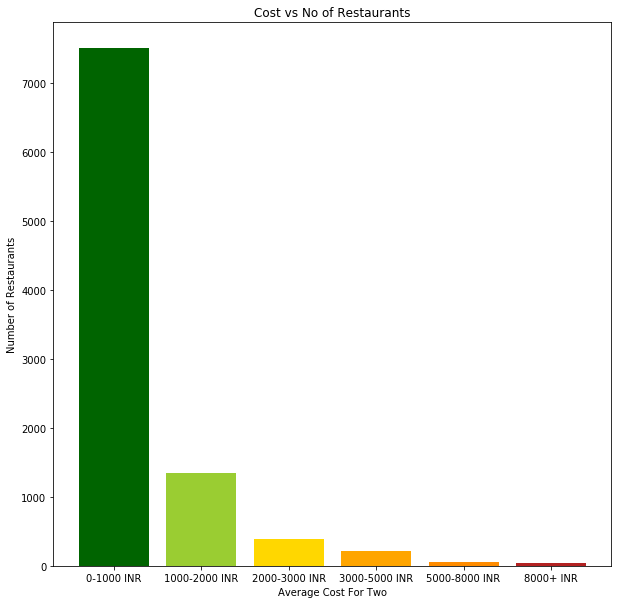

In [89]:
wide = [0.8]
colors = ['darkgreen', 'yellowgreen','gold','orange','darkorange','firebrick']
plt.bar(x,y,width = wide, color = colors, align = 'center')
plt.ylabel("Number of Restaurants")
plt.xlabel("Average Cost For Two")
labels = ['0-1000 INR','1000-2000 INR','2000-3000 INR','3000-5000 INR','5000-8000 INR','8000+ INR'] 
plt.xticks(x, labels)
plt.title("Cost vs No of Restaurants")
plt.savefig('Cost_bar.jpeg')

In [90]:
average_cost_percentage = [0,0,0,0,0,0]
total = np.sum(average_cost_grouped)

In [91]:
index = 0
for value in average_cost_grouped:
    new_value = (value/total) * 100
    new_value = round(new_value , 2)
    average_cost_percentage[index] = new_value
    index += 1
average_cost_percentage

[78.66, 14.07, 4.08, 2.18, 0.64, 0.37]

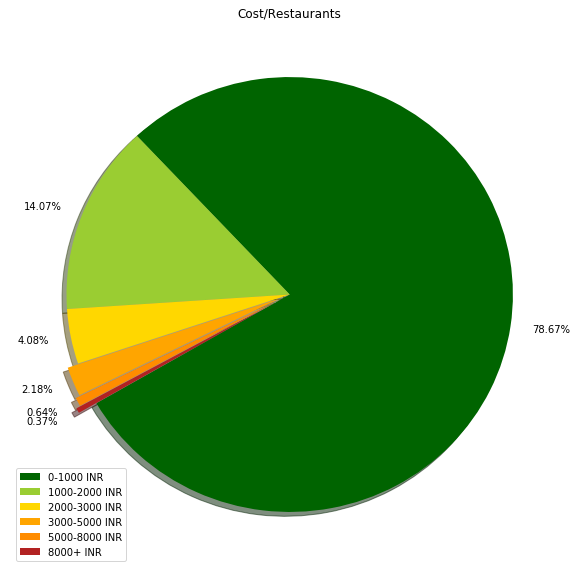

In [101]:
explode = (0,0,0,0.05,0.07,0.09)
labels = ['78.67%','14.07%','4.08%','2.18%','0.64%','0.37%']
colors = ['darkgreen', 'yellowgreen','gold','orange','darkorange','firebrick']
plt.pie(average_cost_percentage, explode = explode , labels = labels, colors = colors, shadow = True ,startangle=210)
labels = ['0-1000 INR','1000-2000 INR','2000-3000 INR','3000-5000 INR','5000-8000 INR','8000+ INR'] 
plt.legend(labels, loc="lower left")
plt.title("Cost/Restaurants")
plt.savefig('cost_pie.jpeg')

In [102]:
#

In [112]:
 df.head()

Country Code              City  \
Restaurant Name                                          
Le Petit Souffle                 162       Makati City   
Izakaya Kikufuji                 162       Makati City   
Heat - Edsa Shangri-La           162  Mandaluyong City   
Ooma                             162  Mandaluyong City   
Sambo Kojin                      162  Mandaluyong City   

                                                Cuisines  \
Restaurant Name                                            
Le Petit Souffle              French, Japanese, Desserts   
Izakaya Kikufuji                                Japanese   
Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
Ooma                                     Japanese, Sushi   
Sambo Kojin                             Japanese, Korean   

                        Average Cost for two  Currency  Has Table booking  \
Restaurant Name                                                             
Le Petit Souffle                        7150       6.5                  1   
Izakaya Kikufuji                        7800       6.5                  1   
Heat - Edsa Shangri-La                 26000       6.5                  1   
Ooma                                    9750       6.5                  0   
Sambo Kojin                             9750       6.5                  1   

                        Has Online delivery  Price range  Aggregate rating  \
Restaurant Name                                                              
Le Petit Souffle                          0            3               4.8   
Izakaya Kikufuji                          0            3               4.5   
Heat - Edsa Shangri-La                    0            4               4.4   
Ooma                                      0            4               4.9   
Sambo Kojin                               0            4               4.8   

                       Rating text  Votes  
Restaurant Name                            
Le Petit Souffle         Excellent    314  
Izakaya Kikufuji         Excellent    591  
Heat - Edsa Shangri-La   Very Good    270  
Ooma                     Excellent    365  
Sambo Kojin              Excellent    229

In [114]:
df = df.drop('Currency',axis = 1)

In [129]:
df = df.drop(['Country Code','Cuisines'],axis = 1)

In [130]:
# final reduced dataframe 


In [132]:
df.head()

City  Average Cost for two  \
Restaurant Name                                                  
Le Petit Souffle             Makati City                  7150   
Izakaya Kikufuji             Makati City                  7800   
Heat - Edsa Shangri-La  Mandaluyong City                 26000   
Ooma                    Mandaluyong City                  9750   
Sambo Kojin             Mandaluyong City                  9750   

                        Has Table booking  Has Online delivery  Price range  \
Restaurant Name                                                               
Le Petit Souffle                        1                    0            3   
Izakaya Kikufuji                        1                    0            3   
Heat - Edsa Shangri-La                  1                    0            4   
Ooma                                    0                    0            4   
Sambo Kojin                             1                    0            4   

                        Aggregate rating Rating text  Votes  
Restaurant Name                                              
Le Petit Souffle                     4.8   Excellent    314  
Izakaya Kikufuji                     4.5   Excellent    591  
Heat - Edsa Shangri-La               4.4   Very Good    270  
Ooma                                 4.9   Excellent    365  
Sambo Kojin                          4.8   Excellent    229

In [136]:
# dataset was imported to dataframe 
# data cleaning (29 null values were removed)
# data cleaning (required type conversions were performed)
# converting of bilinear string values to float for ease of plotting
# reducing dataframe redundancy by dropping repititive features (2 features)
# conversion of 11 currencies into INR for price plots
# 8 plots have been plotted dependant upon 7 features and 10,000 instances
# saving all plots as .jpeg file